Ho ho ho! ‘Tis the season to be jolly!

The holiday season is just around the corner—Christmas trees have been decorated, lights and wreaths hung, streets all decked up
, Santa costumes rented out, and holiday cards in the mailbox. In light of this holiday cheer, retail brands, big and small,
want to earn considerable profits, and therefore, are investing significantly in advertising. These brands have approached an 
advertising agency to plan and execute ad campaigns that will help them increase the footfall in their stores.

You have been hired by this advertising agency to assess the scope of revenue that can be generated by a proposed ad. Based on
the demographic information provided, you need to predict whether the revenue generated will cover costs to produce and air the 
ad. This will help guide decision making for the firm, as they will want to pursue ads that are likely to generate a net gain
for their clients— thereby bolstering the advertising firm’s reputation.

In [ ]:
Data Description

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir(r'D:\HackerEarth Comp-2\Dataset')

In [2]:
df=pd.read_csv("train.csv")
df.drop(['id'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 11 columns):
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 2.0+ MB


In [15]:
df.head()

realtionship_status       industry        genre targeted_sex  \
0  Married-spouse-absent           Auto       Comedy         Male   
1     Married-civ-spouse         Pharma       Comedy         Male   
2               Divorced  Entertainment       Comedy       Female   
3              Separated      Political  Infomercial       Female   
4     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No    False  
1       Low                   No    False  
2      High                  Yes    False  
3       Low                   No    False  
4      High                   No     True

Married-civ-spouse       11844
Never-married             8547
Divorced                  3649
Widowed                    818
Separated                  793
Married-spouse-absent      378
Married-AF-spouse           19
Name: realtionship_status, dtype: int64

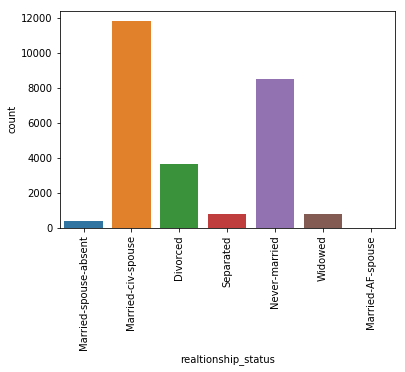

In [25]:
#Relationship_status: The relationship status of the most responsive customers to the advertisement
sns.countplot(df['realtionship_status'])
plt.xticks(rotation=90)
df['realtionship_status'].value_counts() 

Pharma           10339
Auto              6801
Political         4014
Entertainment     2765
Other             1333
ClassAction        796
Name: industry, dtype: int64

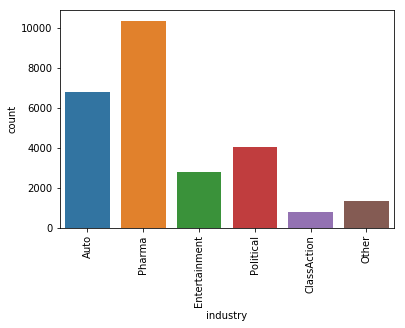

In [38]:
#industry: The industry to which the product belonged
sns.countplot(df['industry'])
plt.xticks(rotation=90)
df['industry'].value_counts()

In [3]:
df_relationship_status=pd.get_dummies(df['realtionship_status'])
df_relationship_status.drop(['Widowed'],axis=1,inplace=True)

df_industry=pd.get_dummies(df['industry'])
df_industry.drop(['Political'],axis=1,inplace=True)

df_genre=pd.get_dummies(df['genre'])
df_genre.drop(['Other'],axis=1,inplace=True)

df_targeted_sex=pd.get_dummies(df['targeted_sex'])
df_targeted_sex.drop(['Male'],axis=1,inplace=True)

df_airtime=pd.get_dummies(df['airtime'])
df_airtime.drop(['Primetime'],axis=1,inplace=True)

df_airlocation=pd.get_dummies(df['airlocation'])
df_airlocation.drop(['Yugoslavia','Holand-Netherlands'],axis=1,inplace=True)

df_expensive=pd.get_dummies(df['expensive'])
df_expensive.drop(['Medium'],axis=1,inplace=True)

df_money_back_guarantee	=pd.get_dummies(df['money_back_guarantee'])
df_money_back_guarantee.drop(['Yes'],axis=1,inplace=True)

df['netgain'].replace({False:0,True:1},inplace=True)

In [100]:
df.head()

realtionship_status       industry        genre targeted_sex  \
0  Married-spouse-absent           Auto       Comedy         Male   
1     Married-civ-spouse         Pharma       Comedy         Male   
2               Divorced  Entertainment       Comedy       Female   
3              Separated      Political  Infomercial       Female   
4     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No        0  
1       Low                   No        0  
2      High                  Yes        0  
3       Low                   No        0  
4      High                   No        1

In [4]:
train=pd.concat([df,df_airlocation,df_airtime,df_expensive,df_genre,df_industry,df_money_back_guarantee,df_relationship_status,df_targeted_sex],axis=1)
train.drop(['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee'],axis=1,inplace=True)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
X=train.drop(['netgain'],axis=1)
y=train[['netgain']]
y=np.array(y).reshape(26048,)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=112)

In [203]:
n=range(1,20)
train_acc=[]
test_acc=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

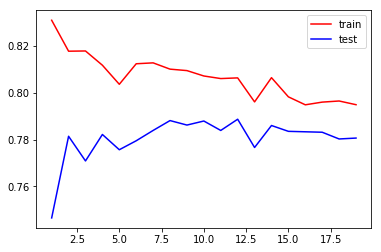

In [204]:
plt.plot(n,train_acc,color='red')
plt.plot(n,test_acc,color='blue')
plt.legend(['train','test'])

In [205]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [206]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)


In [207]:
print("Accuracy on Training_Data: "+str(knn.score(X_train,y_train)))
print("Accuracy on Test_Data: "+str(knn.score(X_test,y_test)))

Accuracy on Training_Data: 0.8127939341587485
Accuracy on Test_Data: 0.7838771593090211


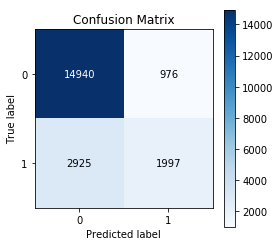

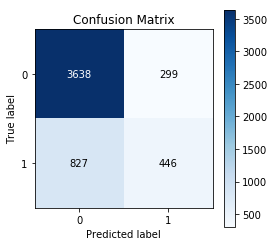

In [208]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred,figsize=(4,4))

In [209]:
#Data Preprocessing (Testing_data_set)
df=pd.read_csv("test.csv")
df.drop(['id'],axis=1,inplace=True)
df_relationship_status=pd.get_dummies(df['realtionship_status'])
df_relationship_status.drop(['Widowed'],axis=1,inplace=True)

df_industry=pd.get_dummies(df['industry'])
df_industry.drop(['Political'],axis=1,inplace=True)

df_genre=pd.get_dummies(df['genre'])
df_genre.drop(['Other'],axis=1,inplace=True)

df_targeted_sex=pd.get_dummies(df['targeted_sex'])
df_targeted_sex.drop(['Male'],axis=1,inplace=True)

df_airtime=pd.get_dummies(df['airtime'])
df_airtime.drop(['Primetime'],axis=1,inplace=True)

df_airlocation=pd.get_dummies(df['airlocation'])
df_airlocation.drop(['Yugoslavia'],axis=1,inplace=True)

df_expensive=pd.get_dummies(df['expensive'])
df_expensive.drop(['Medium'],axis=1,inplace=True)

df_money_back_guarantee	=pd.get_dummies(df['money_back_guarantee'])
df_money_back_guarantee.drop(['Yes'],axis=1,inplace=True)

test=pd.concat([df,df_airlocation,df_airtime,df_expensive,df_genre,df_industry,df_money_back_guarantee,df_relationship_status,df_targeted_sex],axis=1)
test.drop(['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee'],axis=1,inplace=True)


In [183]:
X.head()

average_runtime(minutes_per_week)   ratings  Cambodia  Canada  China  \
0                                 45  0.027465         0       0      0   
1                                 45  0.027465         0       0      0   
2                                 45  0.027465         0       0      0   
3                                 40  0.027465         0       0      0   
4                                 48  0.027465         0       0      0   

   Columbia  Cuba  Dominican-Republic  Ecuador  El-Salvador  ...  Other  \
0         0     0                   0        0            0  ...      0   
1         0     0                   0        0            0  ...      0   
2         0     0                   0        0            0  ...      0   
3         0     0                   0        0            0  ...      0   
4         0     0                   0        0            0  ...      0   

   Pharma  No  Divorced  Married-AF-spouse  Married-civ-spouse  \
0       0   1         0                  0                   0   
1       1   1         0                  0                   1   
2       0   0         1                  0                   0   
3       0   1         0                  0                   0   
4       1   1         0                  0                   1   

   Married-spouse-absent  Never-married  Separated  Female  
0                      1              0          0       0  
1                      0              0          0       0  
2                      0              0          0       1  
3                      0              0          1       1  
4                      0              0          0       0  

[5 rows x 63 columns]

In [189]:
test.head()

id realtionship_status       industry        genre targeted_sex  \
0   1             Widowed           Auto       Comedy       Female   
1   4  Married-civ-spouse         Pharma       Comedy         Male   
2   5            Divorced  Entertainment       Comedy       Female   
3   9  Married-civ-spouse         Pharma  Infomercial         Male   
4  10  Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 10    Daytime  United-States  0.027465   
1                                 40    Morning  United-States  0.056262   
2                                 50    Morning  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 40  Primetime  United-States  0.027465   

  expensive money_back_guarantee  
0       Low                   No  
1      High                  Yes  
2       Low                   No  
3       Low                   No  
4       Low                  Yes

In [210]:
netgain_test=knn.predict(test)
netgain_test=pd.DataFrame(netgain_test)

In [211]:
test_=pd.read_csv("test.csv")
id=test_['id']
sub=pd.concat([id,netgain_test],axis=1)
sub.columns=['id','netgain']
sub['netgain'].replace({0:'False',1:'True'},inplace=True)

In [195]:
sub.head()

id netgain
0   1   False
1   4    True
2   5   False
3   9   False
4  10   False

In [212]:
sub.to_csv("Results.csv",index=False)

# Decision Tree Classifier

In [52]:
# Data Preprocessing
def labelencoding(feature):
    l=len(X[feature].value_counts())
    name=X[feature].unique()
    for i in range(l):
        X[feature].replace({name[i]:i},inplace=True)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
X=df.drop(['netgain'],axis=1)
y=df[['netgain']]

In [5]:
X.head()

realtionship_status       industry        genre targeted_sex  \
0  Married-spouse-absent           Auto       Comedy         Male   
1     Married-civ-spouse         Pharma       Comedy         Male   
2               Divorced  Entertainment       Comedy       Female   
3              Separated      Political  Infomercial       Female   
4     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  
0      High                   No  
1       Low                   No  
2      High                  Yes  
3       Low                   No  
4      High                   No

In [6]:
y.replace({False:0,True:1},inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [17]:
labelencoding('realtionship_status')
labelencoding('industry')
labelencoding('genre')
labelencoding('targeted_sex')
labelencoding('airtime')
labelencoding('airlocation')
labelencoding('expensive')
labelencoding('money_back_guarantee')

In [23]:
X.head()

realtionship_status  industry  genre  targeted_sex  \
0                    0         0      0             0   
1                    1         1      0             0   
2                    2         2      0             1   
3                    3         3      1             1   
4                    1         1      0             0   

   average_runtime(minutes_per_week)  airtime  airlocation   ratings  \
0                                 45        0            0  0.027465   
1                                 45        0            0  0.027465   
2                                 45        0            0  0.027465   
3                                 40        0            0  0.027465   
4                                 48        0            0  0.027465   

   expensive  money_back_guarantee  
0          0                     0  
1          1                     0  
2          0                     1  
3          1                     0  
4          0                     0

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=121)

# For 5 splits(Cross Validation)

In [13]:
dt=DecisionTreeClassifier(random_state=123)
param_grid={"criterion":['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,20),'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }
dt_cv=GridSearchCV(dt,param_grid,cv=5)

In [14]:
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=123,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [21]:
dt_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 2,
 'splitter': 'best'}

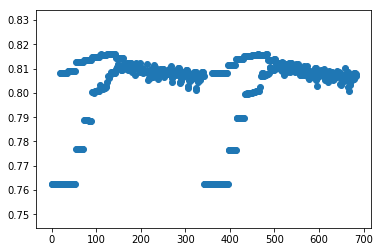

In [23]:
plt.scatter(np.arange(684),dt_cv.cv_results_['mean_test_score'])

# for 10 splits(Cross Validation)

In [25]:
dt=DecisionTreeClassifier(random_state=123)
param_grid={"criterion":['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,20),'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }
dt_cv=GridSearchCV(dt,param_grid,cv=10)
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=123,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

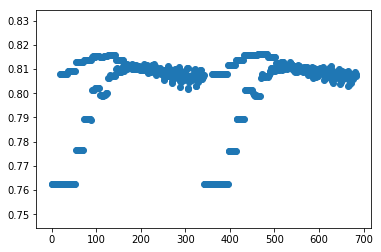

In [26]:
plt.scatter(np.arange(684),dt_cv.cv_results_['mean_test_score'])

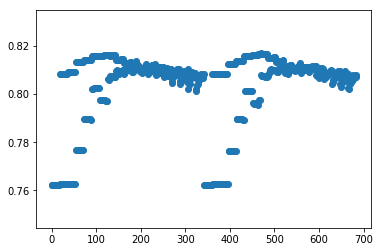

In [27]:
# 20 splits(cross_validation)
dt=DecisionTreeClassifier(random_state=123)
param_grid={"criterion":['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,20),'min_samples_split':[2,3,4,5,6,7,8,9,10]
           }
dt_cv=GridSearchCV(dt,param_grid,cv=20)
dt_cv.fit(X_train,y_train)
plt.scatter(np.arange(684),dt_cv.cv_results_['mean_test_score'])

f1_score: 0.5442840421381193


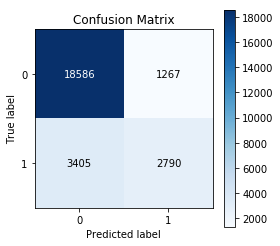

In [11]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=3,splitter='best')
dt.fit(X,y)
y_pred=dt.predict(X)
import scikitplot as skplt
from sklearn.metrics import f1_score
skplt.metrics.plot_confusion_matrix(y,y_pred,figsize=(4,4))
print("f1_score: "+str(f1_score(y,y_pred)))

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Score: 0.8591446560196561


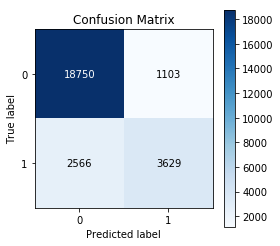

In [13]:
# Lets try Random Forst Classifier with 100 trees
X=df.drop(['netgain'],axis=1)
y=df[['netgain']]
y.replace({False:0,True:1},inplace=True)
labelencoding('realtionship_status')
labelencoding('industry')
labelencoding('genre')
labelencoding('targeted_sex')
labelencoding('airtime')
labelencoding('airlocation')
labelencoding('expensive')
labelencoding('money_back_guarantee')
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=121,n_estimators=100)
rf.fit(X,y)
y_pred=rf.predict(X)
print("Score: "+str(rf.score(X,y)))
skplt.metrics.plot_confusion_matrix(y,y_pred,figsize=(4,4))

In [26]:
# Lets try Random Forst Classifier with grid search cv(5 splittes)
X=df.drop(['netgain'],axis=1)
y=df[['netgain']]
y.replace({False:0,True:1},inplace=True)
labelencoding('realtionship_status')
labelencoding('industry')
labelencoding('genre')
labelencoding('targeted_sex')
labelencoding('airtime')
labelencoding('airlocation')
labelencoding('expensive')
labelencoding('money_back_guarantee')
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=121)
params_grid={'n_estimators':[100],'criterion':['gini','entropy'],'min_samples_split':np.arange(2,15),'min_samples_leaf':np.arange(2,10)}
rf_cv=GridSearchCV(rf,params_grid,cv=5)
rf_cv.fit(X,y)


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vect

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=121,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

{'criterion': 'gini', 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}


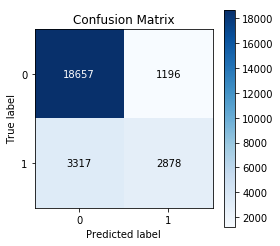

In [37]:
y_pred=rf_cv.predict(X)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y,y_pred,figsize=(4,4))
print(rf_cv.best_params_)

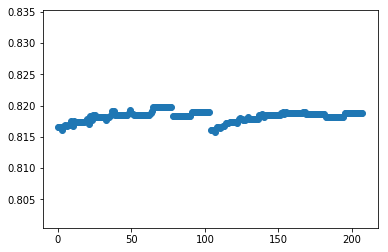

In [36]:
plt.scatter(np.arange(len(rf_cv.cv_results_['mean_test_score'])),rf_cv.cv_results_['mean_test_score'])

In [17]:
# Lets try Random Forst Classifier with grid search cv(10 splittes)(10,20,50 trees)
X=df.drop(['netgain'],axis=1)
y=df[['netgain']]
y.replace({False:0,True:1},inplace=True)
labelencoding('realtionship_status')
labelencoding('industry')
labelencoding('genre')
labelencoding('targeted_sex')
labelencoding('airtime')
labelencoding('airlocation')
labelencoding('expensive')
labelencoding('money_back_guarantee')
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=121)
params_grid={'n_estimators':[10],'criterion':['gini','entropy'],'min_samples_split':np.arange(10,25),'min_samples_leaf':np.arange(10,25)}
rf_cv=GridSearchCV(rf,params_grid,cv=20)
rf_cv.fit(X,y)



C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vect

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
print(rf_cv.best_params_)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1_score: 0.5719277810133955


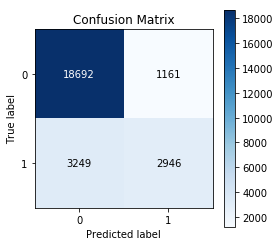

In [43]:
rf=RandomForestClassifier(criterion='entropy',min_samples_leaf=4,min_samples_split=11,n_estimators=200)
rf.fit(X,y)
y_pred=rf.predict(X)
skplt.metrics.plot_confusion_matrix(y,y_pred,figsize=(4,4))
from sklearn.metrics import f1_score
print("F1_score: "+str(f1_score(y,y_pred)))

In [4]:
# Let's build an Artificial Neural Network
df.head()

realtionship_status       industry        genre targeted_sex  \
0  Married-spouse-absent           Auto       Comedy         Male   
1     Married-civ-spouse         Pharma       Comedy         Male   
2               Divorced  Entertainment       Comedy       Female   
3              Separated      Political  Infomercial       Female   
4     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No    False  
1       Low                   No    False  
2      High                  Yes    False  
3       Low                   No    False  
4      High                   No     True

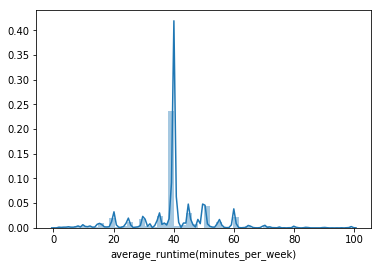

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['average_runtime(minutes_per_week)'])

(array([  601.,  1844.,  1920., 14056.,  2561.,  3062.,  1369.,   334.,
          172.,   129.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

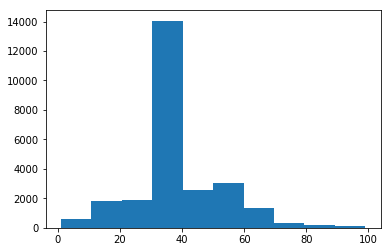

In [8]:
plt.hist(df['average_runtime(minutes_per_week)'])

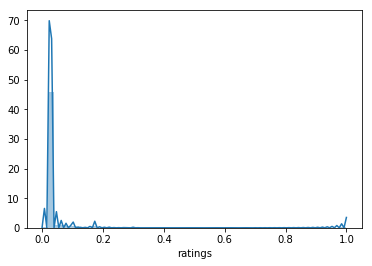

In [12]:
sns.distplot(df['ratings'])

In [14]:
X=df.drop(['average_runtime(minutes_per_week)','ratings'],axis=1)
y=df[['netgain']]
y=y.replace({False:0,True:1})

In [19]:
X.drop(['netgain'],axis=1,inplace=True)
print(X.head())
print(y.head())

   realtionship_status  industry  genre  targeted_sex  airtime  airlocation  \
0                    0         0      0             0        0            0   
1                    1         1      0             0        0            0   
2                    2         2      0             1        0            0   
3                    3         3      1             1        0            0   
4                    1         1      0             0        0            0   

   expensive  money_back_guarantee  
0          0                     0  
1          1                     0  
2          0                     1  
3          1                     0  
4          0                     0  
   netgain
0        0
1        0
2        0
3        0
4        1


In [ ]:

import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Embedding(100,16,input_shape=(8)),
                                  
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(2,activation='sigmoid')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(y)
X_train,X_test,y_train,y_test=train_test_split(X,y_,test_size=0.01,random_state=121,stratify=y_)

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

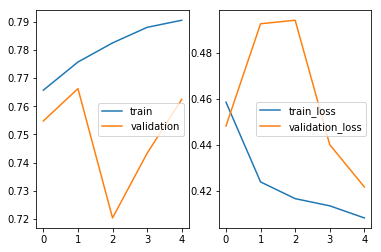

In [14]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss','validation_loss'])


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Score: 0.8591446560196561


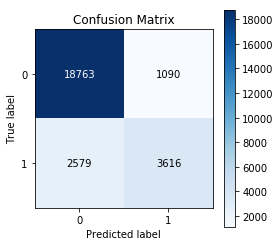

In [16]:
# Lets try Random Forst Classifier with 100 trees
X=df.drop(['netgain'],axis=1)
y=df[['netgain']]
y.replace({False:0,True:1},inplace=True)
labelencoding('realtionship_status')
labelencoding('industry')
labelencoding('genre')
labelencoding('targeted_sex')
labelencoding('airtime')
labelencoding('airlocation')
labelencoding('expensive')
labelencoding('money_back_guarantee')
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=121,n_estimators=10000)
rf.fit(X,y)
y_pred=rf.predict(X)
print("Score: "+str(rf.score(X,y)))
skplt.metrics.plot_confusion_matrix(y,y_pred,figsize=(4,4))

In [ ]:
# Lets try with CV=20 on Decision Tree classifier

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=121)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=121)
params_grid={'criterion':['gini','entropy'],'min_samples_split':np.arange(2,25),'min_samples_leaf':np.arange(2,25),'splitter':['best'
 ,'random'],}
dt_cv=GridSearchCV(dt,params_grid,cv=20)
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=121,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  

Best_Params: {'criterion': 'gini', 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'best'}
Best accuracy score: 0.8159149959281808
F1_score_train: 0.5554564377044305
F1_score_test: 0.5384615384615385


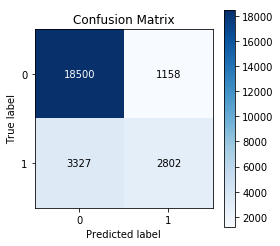

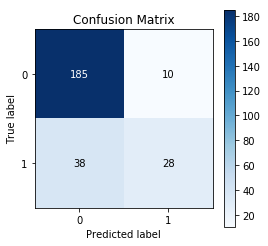

In [33]:
print("Best_Params: "+str(dt_cv.best_params_))
print("Best accuracy score: "+str(dt_cv.best_score_))
dt_best=DecisionTreeClassifier(criterion='gini',min_samples_leaf=17,min_samples_split=2,splitter='best')
dt_best.fit(X_train,y_train)
y_pred_train=dt_best.predict(X_train)
y_pred_test=dt_best.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4))
print("F1_score_train: "+str(f1_score(y_train,y_pred_train)))
print("F1_score_test: "+str(f1_score(y_test,y_pred_test)))

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.001,random_state=121)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=121)
params_grid={'criterion':['gini','entropy'],'min_samples_split':np.arange(2,35),'min_samples_leaf':np.arange(2,35),'splitter':['best'
 ,'random'],}
dt_cv=GridSearchCV(dt,params_grid,cv=40)
dt_cv.fit(X_train,y_train)

X_train_shape: (26021, 10)
X_test_shape: (27, 10)
y_train_shape: (26021, 1)
y_test_shape: (27, 1)


GridSearchCV(cv=40, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=121,
                                              splitter='best'),
             iid='warn', n...
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 2

Best_Params: {'criterion': 'gini', 'min_samples_leaf': 31, 'min_samples_split': 2, 'splitter': 'best'}
Best accuracy score: 0.8162637869413166
F1_score_train: 0.546451355661882
F1_score_test: 0.5294117647058824


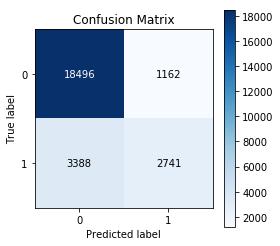

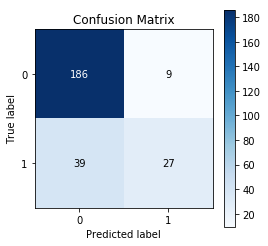

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=121)
print("Best_Params: "+str(dt_cv.best_params_))
print("Best accuracy score: "+str(dt_cv.best_score_))
dt_best=DecisionTreeClassifier(criterion='gini',min_samples_leaf=31,min_samples_split=2,splitter='best')
dt_best.fit(X_train,y_train)
y_pred_train=dt_best.predict(X_train)
y_pred_test=dt_best.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4))
print("F1_score_train: "+str(f1_score(y_train,y_pred_train)))
print("F1_score_test: "+str(f1_score(y_test,y_pred_test)))

In [72]:
from sklearn.preprocessing import KBinsDiscretizer as KBD
enc=KBD(encode='ordinal',n_bins=8)  
X['average_runtime(minutes_per_week)']=enc.fit_transform(X[['average_runtime(minutes_per_week)']])
enc_1=KBD(encode='ordinal',n_bins=8)  
X['ratings']=enc_1.fit_transform(X[['ratings']])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [73]:
X.head()

realtionship_status  industry  genre  targeted_sex  \
0                    0         0      0             0   
1                    1         1      0             0   
2                    2         2      0             1   
3                    3         3      1             1   
4                    1         1      0             0   

   average_runtime(minutes_per_week)  airtime  airlocation  ratings  \
0                                3.0        0            0      1.0   
1                                3.0        0            0      1.0   
2                                3.0        0            0      1.0   
3                                2.0        0            0      1.0   
4                                3.0        0            0      1.0   

   expensive  money_back_guarantee  
0          0                     0  
1          1                     0  
2          0                     1  
3          1                     0  
4          0                     0

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=121)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=121)
params_grid={'criterion':['gini','entropy'],'min_samples_split':np.arange(2,35),'min_samples_leaf':np.arange(2,35),'splitter':['best'
 ,'random'],}
dt_cv=GridSearchCV(dt,params_grid,cv=5)
dt_cv.fit(X_train,y_train)

X_train_shape: (25787, 10)
X_test_shape: (261, 10)
y_train_shape: (25787, 1)
y_test_shape: (261, 1)


KeyboardInterrupt: 

In [ ]:

print("Best_Params: "+str(dt_cv.best_params_))
print("Best accuracy score: "+str(dt_cv.best_score_))
svc_best=DecisionTreeClassifier(criterion='gini',min_samples_leaf=31,min_samples_split=2,splitter='best')
dt_best.fit(X_train,y_train)
y_pred_train=dt_best.predict(X_train)
y_pred_test=dt_best.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4))
print("F1_score_train: "+str(f1_score(y_train,y_pred_train)))
print("F1_score_test: "+str(f1_score(y_test,y_pred_test)))

In [12]:
# Let's try Support Vector Machines by dropping 2 features
X.head()



realtionship_status  industry  genre  targeted_sex  \
0                    0         0      0             0   
1                    1         1      0             0   
2                    2         2      0             1   
3                    3         3      1             1   
4                    1         1      0             0   

   average_runtime(minutes_per_week)  airtime  airlocation   ratings  \
0                                 45        0            0  0.027465   
1                                 45        0            0  0.027465   
2                                 45        0            0  0.027465   
3                                 40        0            0  0.027465   
4                                 48        0            0  0.027465   

   expensive  money_back_guarantee  
0          0                     0  
1          1                     0  
2          0                     1  
3          1                     0  
4          0                     0

In [ ]:
X.drop(['average_runtime(minutes_per_week)','ratings'],axis=1,inplace=True)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC(random_state=121)
params_grid={'C':[1,1.25,1.5,1.75,2,2.25,2.5,2.75,3],'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'degree':[3,4,5,6,7,8,9,10],
            'gamma':['scale','auto'],}
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.001,random_state=121)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))
svc_cv=GridSearchCV(svc,params_grid,cv=10)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params)

X_train_shape: (26021, 8)
X_test_shape: (27, 8)
y_train_shape: (26021, 1)
y_test_shape: (27, 1)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [ ]:
svc_best=SVC(C='gini',kernels=31,degree=2,gamma='best')
svc_best.fit(X_train,y_train)
y_pred_train=svc_best.predict(X_train)
y_pred_test=svc_best.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,figsize=(4,4))
print("F1_score_train: "+str(f1_score(y_train,y_pred_train)))
print("F1_score_test: "+str(f1_score(y_test,y_pred_test)))

In [14]:
X=pd.read_csv("test.csv")
X.drop(['id'],axis=1,inplace=True)
labelencoding('realtionship_status')
labelencoding('industry')
labelencoding('genre')
labelencoding('targeted_sex')
labelencoding('airtime')
labelencoding('airlocation')
labelencoding('expensive')
labelencoding('money_back_guarantee')

In [15]:
netgain_test=rf.predict(X)
netgain_test=pd.DataFrame(netgain_test)
test_=pd.read_csv("test.csv")
id=test_['id']
sub=pd.concat([id,netgain_test],axis=1)
sub.columns=['id','netgain']
sub['netgain'].replace({0:'False',1:'True'},inplace=True)
sub.to_csv("Results_rf02.csv",index=False)

In [4]:
df.head()

realtionship_status       industry        genre targeted_sex  \
0  Married-spouse-absent           Auto       Comedy         Male   
1     Married-civ-spouse         Pharma       Comedy         Male   
2               Divorced  Entertainment       Comedy       Female   
3              Separated      Political  Infomercial       Female   
4     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No    False  
1       Low                   No    False  
2      High                  Yes    False  
3       Low                   No    False  
4      High                   No     True

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
df=pd.read_csv("train.csv")
df.drop(['id'],axis=1,inplace=True)

Comedy         22258
Infomercial     2516
Drama            803
Direct           247
Other            224
Name: genre, dtype: int64


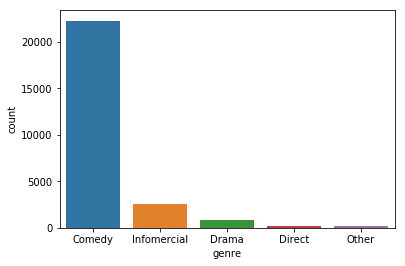

In [4]:
sns.countplot(df['genre'])
print(df['genre'].value_counts())

Male      17245
Female     8803
Name: targeted_sex, dtype: int64


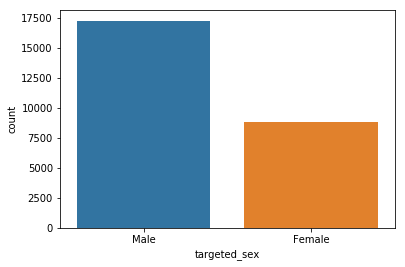

In [26]:
sns.countplot(df['targeted_sex'])
print(df['targeted_sex'].value_counts())

Primetime    15652
Morning       8531
Daytime       1865
Name: airtime, dtype: int64


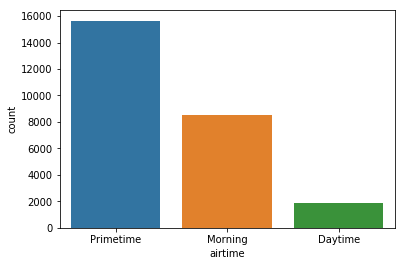

In [27]:
sns.countplot(df['airtime'])
print(df['airtime'].value_counts())

United-States                 23250
Mexico                          523
International                   465
Philippines                     141
Germany                         114
Canada                           94
Cuba                             86
Puerto-Rico                      85
El-Salvador                      84
India                            81
England                          79
Italy                            70
South                            69
Poland                           66
Jamaica                          63
Dominican-Republic               62
Guatemala                        61
Vietnam                          57
Columbia                         55
Japan                            54
China                            53
Taiwan                           37
Iran                             36
Haiti                            35
Ecuador                          31
Portugal                         30
Peru                             28
Nicaragua                   

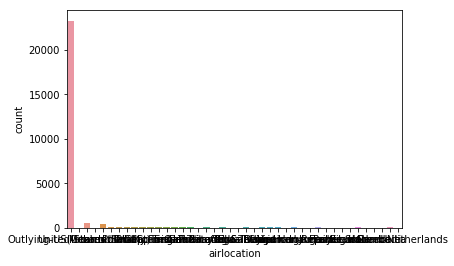

In [31]:
sns.countplot(df['airlocation'])
print(df['airlocation'].value_counts())

In [4]:
# Dropping Rows which contains Holand-Netherlands as airlocation
index_HN=(df['airlocation']=='Holand-Netherlands')
df[index_HN]

realtionship_status     industry   genre targeted_sex  \
8494        Never-married  ClassAction  Comedy         Male   
25764       Never-married  ClassAction  Comedy       Female   

       average_runtime(minutes_per_week)  airtime         airlocation  \
8494                                  30  Morning  Holand-Netherlands   
25764                                 24  Morning  Holand-Netherlands   

        ratings expensive money_back_guarantee  netgain  
8494   0.027465       Low                   No    False  
25764  0.027465       Low                   No    False

In [5]:
df.drop([8494,25764],inplace=True)

Low       15691
High       7279
Medium     3076
Name: expensive, dtype: int64


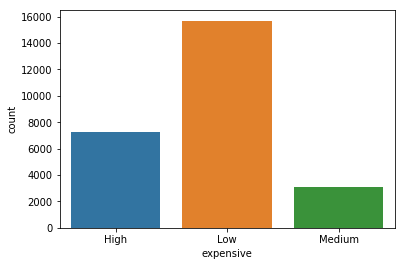

In [7]:
sns.countplot(df['expensive'])
print(df['expensive'].value_counts())

Yes    13073
No     12973
Name: money_back_guarantee, dtype: int64


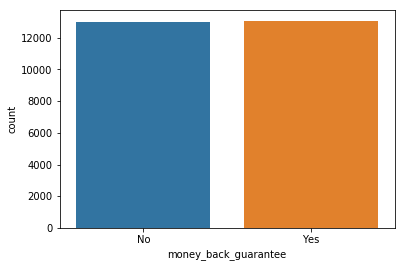

In [53]:

sns.countplot(df['money_back_guarantee'])
print(df['money_back_guarantee'].value_counts())

In [6]:
# Data Preprocessing
def labelencoding(feature):
    l=len(df[feature].value_counts())
    name=df[feature].unique()
    for i in range(l):
        df[feature].replace({name[i]:i},inplace=True)

In [9]:
df.head()

realtionship_status       industry        genre targeted_sex  \
0  Married-spouse-absent           Auto       Comedy         Male   
1     Married-civ-spouse         Pharma       Comedy         Male   
2               Divorced  Entertainment       Comedy       Female   
3              Separated      Political  Infomercial       Female   
4     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No    False  
1       Low                   No    False  
2      High                  Yes    False  
3       Low                   No    False  
4      High                   No     True

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26046 entries, 0 to 26047
Data columns (total 11 columns):
realtionship_status                  26046 non-null object
industry                             26046 non-null object
genre                                26046 non-null object
targeted_sex                         26046 non-null object
average_runtime(minutes_per_week)    26046 non-null int64
airtime                              26046 non-null object
airlocation                          26046 non-null object
ratings                              26046 non-null float64
expensive                            26046 non-null object
money_back_guarantee                 26046 non-null object
netgain                              26046 non-null bool
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 2.2+ MB


In [7]:
#Data Preprocessing (Training_data_set)

df_relationship_status=pd.get_dummies(df['realtionship_status'])
df_relationship_status.drop(['Widowed'],axis=1,inplace=True)

df_industry=pd.get_dummies(df['industry'])
df_industry.drop(['Political'],axis=1,inplace=True)

df_genre=pd.get_dummies(df['genre'])
df_genre.drop(['Other'],axis=1,inplace=True)

df_targeted_sex=pd.get_dummies(df['targeted_sex'])
df_targeted_sex.drop(['Male'],axis=1,inplace=True)

df_airtime=pd.get_dummies(df['airtime'])
df_airtime.drop(['Primetime'],axis=1,inplace=True)

df_airlocation=pd.get_dummies(df['airlocation'])
df_airlocation.drop(['Yugoslavia'],axis=1,inplace=True)



df_money_back_guarantee	=pd.get_dummies(df['money_back_guarantee'])
df_money_back_guarantee.drop(['Yes'],axis=1,inplace=True)

X=pd.concat([df,df_airlocation,df_airtime,df_genre,df_industry,df_money_back_guarantee,df_relationship_status,df_targeted_sex],axis=1)
X.drop(['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','money_back_guarantee'],axis=1,inplace=True)


In [8]:
X['expensive']=X['expensive'].replace({"Low":0,"Medium":1,"High":2})

In [12]:
X.head()

average_runtime(minutes_per_week)   ratings  expensive  netgain  Cambodia  \
0                                 45  0.027465          2    False         0   
1                                 45  0.027465          0    False         0   
2                                 45  0.027465          2    False         0   
3                                 40  0.027465          0    False         0   
4                                 48  0.027465          2     True         0   

   Canada  China  Columbia  Cuba  Dominican-Republic  ...  Other  Pharma  No  \
0       0      0         0     0                   0  ...      0       0   1   
1       0      0         0     0                   0  ...      0       1   1   
2       0      0         0     0                   0  ...      0       0   0   
3       0      0         0     0                   0  ...      0       0   1   
4       0      0         0     0                   0  ...      0       1   1   

   Divorced  Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0         0                  0                   0                      1   
1         0                  0                   1                      0   
2         1                  0                   0                      0   
3         0                  0                   0                      0   
4         0                  0                   1                      0   

   Never-married  Separated  Female  
0              0          0       0  
1              0          0       0  
2              0          0       1  
3              0          1       1  
4              0          0       0  

[5 rows x 63 columns]

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26046 entries, 0 to 26047
Data columns (total 63 columns):
average_runtime(minutes_per_week)    26046 non-null int64
ratings                              26046 non-null float64
expensive                            26046 non-null int64
netgain                              26046 non-null bool
Cambodia                             26046 non-null uint8
Canada                               26046 non-null uint8
China                                26046 non-null uint8
Columbia                             26046 non-null uint8
Cuba                                 26046 non-null uint8
Dominican-Republic                   26046 non-null uint8
Ecuador                              26046 non-null uint8
El-Salvador                          26046 non-null uint8
England                              26046 non-null uint8
France                               26046 non-null uint8
Germany                              26046 non-null uint8
Greece              

In [9]:
lables=X[['netgain']]
features=X.drop(['netgain'],axis=1)

In [10]:
lables=lables.replace({False:0,True:1})

In [11]:
test=pd.read_csv("test.csv")
test.head()

id realtionship_status       industry        genre targeted_sex  \
0   1             Widowed           Auto       Comedy       Female   
1   4  Married-civ-spouse         Pharma       Comedy         Male   
2   5            Divorced  Entertainment       Comedy       Female   
3   9  Married-civ-spouse         Pharma  Infomercial         Male   
4  10  Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 10    Daytime  United-States  0.027465   
1                                 40    Morning  United-States  0.056262   
2                                 50    Morning  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 40  Primetime  United-States  0.027465   

  expensive money_back_guarantee  
0       Low                   No  
1      High                  Yes  
2       Low                   No  
3       Low                   No  
4       Low                  Yes

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 11 columns):
id                                   6513 non-null int64
realtionship_status                  6513 non-null object
industry                             6513 non-null object
genre                                6513 non-null object
targeted_sex                         6513 non-null object
average_runtime(minutes_per_week)    6513 non-null int64
airtime                              6513 non-null object
airlocation                          6513 non-null object
ratings                              6513 non-null float64
expensive                            6513 non-null object
money_back_guarantee                 6513 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 559.8+ KB


In [12]:
#Data Preprocessing (Testing_data_set)

test_relationship_status=pd.get_dummies(test['realtionship_status'])
test_relationship_status.drop(['Widowed'],axis=1,inplace=True)

test_industry=pd.get_dummies(test['industry'])
test_industry.drop(['Political'],axis=1,inplace=True)

test_genre=pd.get_dummies(test['genre'])
test_genre.drop(['Other'],axis=1,inplace=True)

test_targeted_sex=pd.get_dummies(test['targeted_sex'])
test_targeted_sex.drop(['Male'],axis=1,inplace=True)

test_airtime=pd.get_dummies(test['airtime'])
test_airtime.drop(['Primetime'],axis=1,inplace=True)

test_airlocation=pd.get_dummies(test['airlocation'])
test_airlocation.drop(['Yugoslavia'],axis=1,inplace=True)



test_money_back_guarantee=pd.get_dummies(test['money_back_guarantee'])
test_money_back_guarantee.drop(['Yes'],axis=1,inplace=True)

test_final=pd.concat([test,test_airlocation,test_airtime,test_genre,test_industry,test_money_back_guarantee,test_relationship_status,test_targeted_sex],axis=1)
test_final.drop(['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','money_back_guarantee'],axis=1,inplace=True)


In [13]:
test_final['expensive']=test_final['expensive'].replace({"Low":0,"Medium":1,"High":2})
test_final.drop(['id'],axis=1,inplace=True)

In [18]:
test_final.head()

average_runtime(minutes_per_week)   ratings  expensive  Cambodia  Canada  \
0                                 10  0.027465          0         0       0   
1                                 40  0.056262          2         0       0   
2                                 50  0.027465          0         0       0   
3                                 40  0.027465          0         0       0   
4                                 40  0.027465          0         0       0   

   China  Columbia  Cuba  Dominican-Republic  Ecuador  ...  Other  Pharma  No  \
0      0         0     0                   0        0  ...      0       0   1   
1      0         0     0                   0        0  ...      0       1   0   
2      0         0     0                   0        0  ...      0       0   1   
3      0         0     0                   0        0  ...      0       1   1   
4      0         0     0                   0        0  ...      0       1   0   

   Divorced  Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0         0                  0                   0                      0   
1         0                  0                   1                      0   
2         1                  0                   0                      0   
3         0                  0                   1                      0   
4         0                  0                   1                      0   

   Never-married  Separated  Female  
0              0          0       1  
1              0          0       0  
2              0          0       1  
3              0          0       0  
4              0          0       0  

[5 rows x 62 columns]

In [90]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 62 columns):
average_runtime(minutes_per_week)    6513 non-null int64
ratings                              6513 non-null float64
expensive                            6513 non-null int64
Cambodia                             6513 non-null uint8
Canada                               6513 non-null uint8
China                                6513 non-null uint8
Columbia                             6513 non-null uint8
Cuba                                 6513 non-null uint8
Dominican-Republic                   6513 non-null uint8
Ecuador                              6513 non-null uint8
El-Salvador                          6513 non-null uint8
England                              6513 non-null uint8
France                               6513 non-null uint8
Germany                              6513 non-null uint8
Greece                               6513 non-null uint8
Guatemala                           

In [91]:
features.head()

average_runtime(minutes_per_week)   ratings  expensive  Cambodia  Canada  \
0                                 45  0.027465          2         0       0   
1                                 45  0.027465          0         0       0   
2                                 45  0.027465          2         0       0   
3                                 40  0.027465          0         0       0   
4                                 48  0.027465          2         0       0   

   China  Columbia  Cuba  Dominican-Republic  Ecuador  ...  Other  Pharma  No  \
0      0         0     0                   0        0  ...      0       0   1   
1      0         0     0                   0        0  ...      0       1   1   
2      0         0     0                   0        0  ...      0       0   0   
3      0         0     0                   0        0  ...      0       0   1   
4      0         0     0                   0        0  ...      0       1   1   

   Divorced  Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0         0                  0                   0                      1   
1         0                  0                   1                      0   
2         1                  0                   0                      0   
3         0                  0                   0                      0   
4         0                  0                   1                      0   

   Never-married  Separated  Female  
0              0          0       0  
1              0          0       0  
2              0          0       1  
3              0          1       1  
4              0          0       0  

[5 rows x 62 columns]

In [93]:
test_final.head()

average_runtime(minutes_per_week)   ratings  expensive  Cambodia  Canada  \
0                                 10  0.027465          0         0       0   
1                                 40  0.056262          2         0       0   
2                                 50  0.027465          0         0       0   
3                                 40  0.027465          0         0       0   
4                                 40  0.027465          0         0       0   

   China  Columbia  Cuba  Dominican-Republic  Ecuador  ...  Other  Pharma  No  \
0      0         0     0                   0        0  ...      0       0   1   
1      0         0     0                   0        0  ...      0       1   0   
2      0         0     0                   0        0  ...      0       0   1   
3      0         0     0                   0        0  ...      0       1   1   
4      0         0     0                   0        0  ...      0       1   0   

   Divorced  Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0         0                  0                   0                      0   
1         0                  0                   1                      0   
2         1                  0                   0                      0   
3         0                  0                   1                      0   
4         0                  0                   1                      0   

   Never-married  Separated  Female  
0              0          0       1  
1              0          0       0  
2              0          0       1  
3              0          0       0  
4              0          0       0  

[5 rows x 62 columns]

In [96]:
# Scaling
features['ratings']=(features['ratings']-features['ratings'].min())/(features['ratings'].max()-features['ratings'].min())


In [98]:
# Scaling
features['average_runtime(minutes_per_week)']=(features['average_runtime(minutes_per_week)']-features['average_runtime(minutes_per_week)'].min())/(features['average_runtime(minutes_per_week)'].max()-features['average_runtime(minutes_per_week)'].min())

In [97]:
# Scaling
test_final['average_runtime(minutes_per_week)']=(test_final['average_runtime(minutes_per_week)']-test_final['average_runtime(minutes_per_week)'].min())/(test_final['average_runtime(minutes_per_week)'].max()-test_final['average_runtime(minutes_per_week)'].min())
# Scaling
test_final['ratings']=(test_final['ratings']-test_final['ratings'].min())/(test_final['ratings'].max()-test_final['ratings'].min())


In [14]:
features.drop(['average_runtime(minutes_per_week)','ratings'],axis=1,inplace=True)
test_final.drop(['average_runtime(minutes_per_week)','ratings'],axis=1,inplace=True)

In [17]:
features.head()

expensive  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
0          2         0       0      0         0     0                   0   
1          0         0       0      0         0     0                   0   
2          2         0       0      0         0     0                   0   
3          0         0       0      0         0     0                   0   
4          2         0       0      0         0     0                   0   

   Ecuador  El-Salvador  England  ...  Other  Pharma  No  Divorced  \
0        0            0        0  ...      0       0   1         0   
1        0            0        0  ...      0       1   1         0   
2        0            0        0  ...      0       0   0         1   
3        0            0        0  ...      0       0   1         0   
4        0            0        0  ...      0       1   1         0   

   Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0                  0                   0                      1   
1                  0                   1                      0   
2                  0                   0                      0   
3                  0                   0                      0   
4                  0                   1                      0   

   Never-married  Separated  Female  
0              0          0       0  
1              0          0       0  
2              0          0       1  
3              0          1       1  
4              0          0       0  

[5 rows x 60 columns]

In [18]:
test_final.head()

expensive  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
0          0         0       0      0         0     0                   0   
1          2         0       0      0         0     0                   0   
2          0         0       0      0         0     0                   0   
3          0         0       0      0         0     0                   0   
4          0         0       0      0         0     0                   0   

   Ecuador  El-Salvador  England  ...  Other  Pharma  No  Divorced  \
0        0            0        0  ...      0       0   1         0   
1        0            0        0  ...      0       1   0         0   
2        0            0        0  ...      0       0   1         1   
3        0            0        0  ...      0       1   1         0   
4        0            0        0  ...      0       1   0         0   

   Married-AF-spouse  Married-civ-spouse  Married-spouse-absent  \
0                  0                   0                      0   
1                  0                   1                      0   
2                  0                   0                      0   
3                  0                   1                      0   
4                  0                   1                      0   

   Never-married  Separated  Female  
0              0          0       1  
1              0          0       0  
2              0          0       1  
3              0          0       0  
4              0          0       0  

[5 rows x 60 columns]

X_train_shape: (25785, 60)
X_test_shape: (261, 60)
y_train_shape: (25785, 2)
y_test_shape: (261, 2)
Train on 25785 samples, validate on 261 samples
Epoch 1/50
25785/25785 [==============================] - 7s 272us/sample - loss: 0.4395 - accuracy: 0.7605 - val_loss: 0.4172 - val_accuracy: 0.7625
Epoch 2/50
25785/25785 [==============================] - 6s 251us/sample - loss: 0.4319 - accuracy: 0.7643 - val_loss: 0.4272 - val_accuracy: 0.7931
Epoch 3/50
25785/25785 [==============================] - 6s 249us/sample - loss: 0.4305 - accuracy: 0.7665 - val_loss: 0.4200 - val_accuracy: 0.7969
Epoch 4/50
25785/25785 [==============================] - 6s 240us/sample - loss: 0.4310 - accuracy: 0.7646 - val_loss: 0.4430 - val_accuracy: 0.7969
Epoch 5/50
25785/25785 [==============================] - 6s 235us/sample - loss: 0.4302 - accuracy: 0.7656 - val_loss: 0.4418 - val_accuracy: 0.7969
Epoch 6/50
25785/25785 [==============================] - 6s 224us/sample - loss: 0.4305 - accuracy: 0

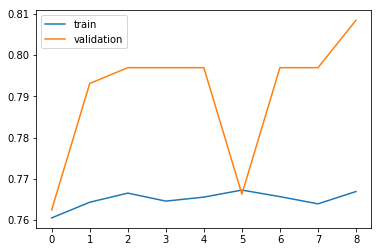

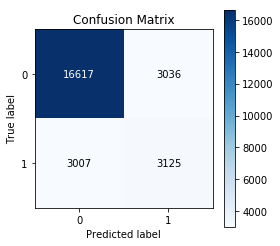

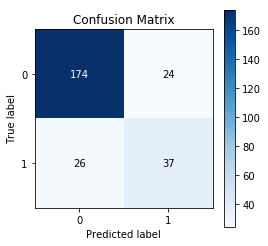

In [21]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.800):
            print('cancelling since validation accuracy has been reached to 80%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Dense(10,input_shape=(60,),activation='relu'),
    tf.keras.layers.Dense(264,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu'),
  #  tf.keras.layers.Dense(32,activation='relu'),
                                  
                             
                             tf.keras.layers.Dense(2,activation='softmax')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

X_train_shape: (25785, 60)
X_test_shape: (261, 60)
y_train_shape: (25785, 2)
y_test_shape: (261, 2)
Train on 25785 samples, validate on 261 samples
Epoch 1/50
25785/25785 [==============================] - 7s 255us/sample - loss: 0.4336 - accuracy: 0.7654 - val_loss: 0.4531 - val_accuracy: 0.7893
Epoch 2/50
25785/25785 [==============================] - 6s 223us/sample - loss: 0.4320 - accuracy: 0.7696 - val_loss: 0.4708 - val_accuracy: 0.8008
Epoch 3/50
25785/25785 [==============================] - 6s 217us/sample - loss: 0.4321 - accuracy: 0.7676 - val_loss: 0.4612 - val_accuracy: 0.8008
Epoch 4/50
25785/25785 [==============================] - 6s 231us/sample - loss: 0.4334 - accuracy: 0.7665 - val_loss: 0.4650 - val_accuracy: 0.7854
Epoch 5/50
25785/25785 [==============================] - 6s 225us/sample - loss: 0.4329 - accuracy: 0.7665 - val_loss: 0.4608 - val_accuracy: 0.7854
Epoch 6/50
25785/25785 [==============================] - 6s 231us/sample - loss: 0.4353 - accuracy: 0

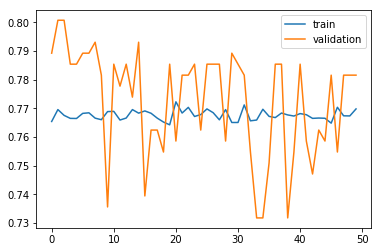

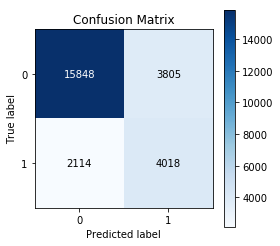

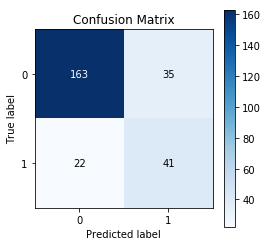

In [27]:
#Loading Model with 80% Val Accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.85):
            print('cancelling since validation accuracy has been reached to 85%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
model=load_model("Model80%.h5")
                                  
                             
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

Using TensorFlow backend.


X_train_shape: (25785, 60)
X_test_shape: (261, 60)
y_train_shape: (25785, 2)
y_test_shape: (261, 2)
Train on 25785 samples, validate on 261 samples
Epoch 1/50
25785/25785 [==============================] - 8s 328us/sample - loss: 0.4783 - accuracy: 0.7665 - val_loss: 0.5219 - val_accuracy: 0.7816
Epoch 2/50
25785/25785 [==============================] - 6s 238us/sample - loss: 0.4750 - accuracy: 0.7707 - val_loss: 0.4943 - val_accuracy: 0.7854
Epoch 3/50
25785/25785 [==============================] - 6s 236us/sample - loss: 0.4785 - accuracy: 0.7682 - val_loss: 0.5836 - val_accuracy: 0.7816
Epoch 4/50
25785/25785 [==============================] - 6s 230us/sample - loss: 0.4752 - accuracy: 0.7694 - val_loss: 0.5053 - val_accuracy: 0.7816
Epoch 5/50
25785/25785 [==============================] - 6s 233us/sample - loss: 0.4719 - accuracy: 0.7695 - val_loss: 0.5033 - val_accuracy: 0.7816
Epoch 6/50
25785/25785 [==============================] - 6s 232us/sample - loss: 0.4812 - accuracy: 0

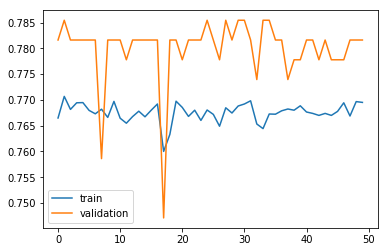

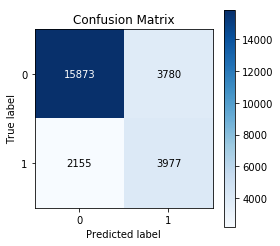

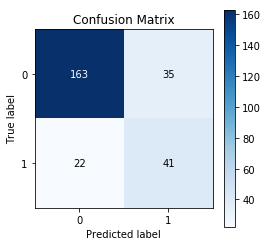

In [19]:
#Loading Model with 80% Val Accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.85):
            print('cancelling since validation accuracy has been reached to 85%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
model=load_model("Model80%.h5")
                                  
                             
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_2%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

X_train_shape: (25785, 60)
X_test_shape: (261, 60)
y_train_shape: (25785, 2)
y_test_shape: (261, 2)
Train on 25785 samples, validate on 261 samples
Epoch 1/50
25785/25785 [==============================] - 6s 243us/sample - loss: 0.6581 - accuracy: 0.7679 - val_loss: 0.6710 - val_accuracy: 0.7778
Epoch 2/50
25785/25785 [==============================] - 6s 242us/sample - loss: 0.6805 - accuracy: 0.7676 - val_loss: 0.7084 - val_accuracy: 0.7778
Epoch 3/50
25785/25785 [==============================] - 6s 247us/sample - loss: 0.7315 - accuracy: 0.7656 - val_loss: 0.7532 - val_accuracy: 0.7854
Epoch 4/50
25785/25785 [==============================] - 6s 250us/sample - loss: 0.7419 - accuracy: 0.7631 - val_loss: 0.7181 - val_accuracy: 0.7778
Epoch 5/50
25785/25785 [==============================] - 6s 230us/sample - loss: 0.7473 - accuracy: 0.7639 - val_loss: 0.7141 - val_accuracy: 0.7778
Epoch 6/50
25785/25785 [==============================] - 6s 229us/sample - loss: 0.7511 - accuracy: 0

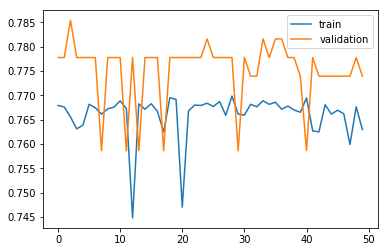

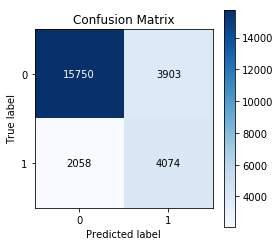

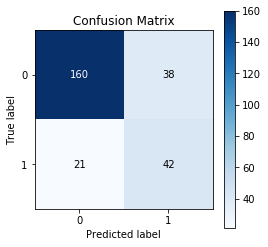

In [22]:
#Loading Model with 80% Val Accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.85):
            print('cancelling since validation accuracy has been reached to 85%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
model=load_model("Model80_2%.h5")
                                  
                             
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_3%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

Using TensorFlow backend.


X_train_shape: (25785, 60)
X_test_shape: (261, 60)
y_train_shape: (25785, 2)
y_test_shape: (261, 2)
Train on 25785 samples, validate on 261 samples
Epoch 1/50
25785/25785 [==============================] - 4s 141us/sample - loss: 0.8780 - accuracy: 0.7620 - val_loss: 0.8635 - val_accuracy: 0.7739
Epoch 2/50
25785/25785 [==============================] - 3s 103us/sample - loss: 0.8667 - accuracy: 0.7651 - val_loss: 0.8301 - val_accuracy: 0.7739
Epoch 3/50
25785/25785 [==============================] - 3s 103us/sample - loss: 0.8980 - accuracy: 0.7663 - val_loss: 0.8226 - val_accuracy: 0.7816
Epoch 4/50
25785/25785 [==============================] - 3s 105us/sample - loss: 1.0338 - accuracy: 0.7515 - val_loss: 0.7330 - val_accuracy: 0.7778
Epoch 5/50
25785/25785 [==============================] - 3s 108us/sample - loss: 0.8827 - accuracy: 0.7629 - val_loss: 0.7160 - val_accuracy: 0.7739
Epoch 6/50
25785/25785 [==============================] - 3s 121us/sample - loss: 0.9921 - accuracy: 0

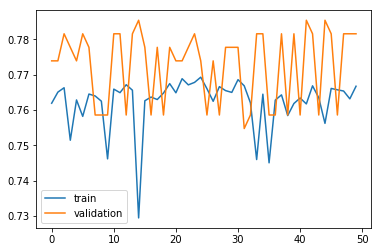

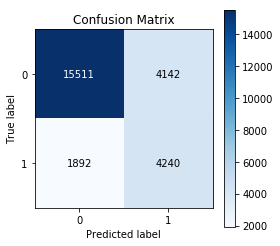

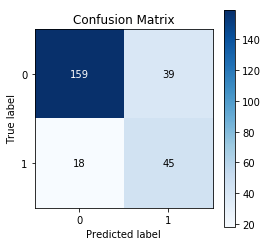

In [15]:
#Loading Model with 80% Val Accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.85):
            print('cancelling since validation accuracy has been reached to 85%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
model=load_model("Model80_3%.h5")
                                  
                             
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train.shape))
print("y_test_shape: "+str(y_test.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_4%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

X_train_shape: (25527, 60)
X_test_shape: (261, 60)
y_train_shape: (25527, 2)
y_test_shape: (261, 2)
X_validation_shape: (258, 60)
y_validation_shape: (258, 2)
Train on 25527 samples, validate on 261 samples
Epoch 1/100
25527/25527 [==============================] - 4s 137us/sample - loss: 0.4397 - accuracy: 0.7635 - val_loss: 0.4200 - val_accuracy: 0.7931
Epoch 2/100
25527/25527 [==============================] - 3s 124us/sample - loss: 0.4320 - accuracy: 0.7683 - val_loss: 0.4165 - val_accuracy: 0.7586
Epoch 3/100
25527/25527 [==============================] - 3s 126us/sample - loss: 0.4333 - accuracy: 0.7667 - val_loss: 0.4245 - val_accuracy: 0.7548
Epoch 4/100
25527/25527 [==============================] - 3s 117us/sample - loss: 0.4344 - accuracy: 0.7674 - val_loss: 0.4339 - val_accuracy: 0.7893
Epoch 5/100
25527/25527 [==============================] - 3s 112us/sample - loss: 0.4366 - accuracy: 0.7676 - val_loss: 0.4620 - val_accuracy: 0.7854
Epoch 6/100
25527/25527 [=============

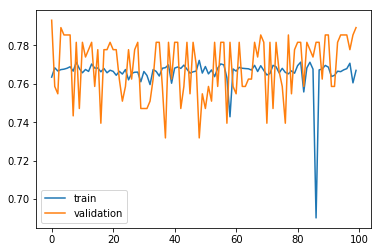

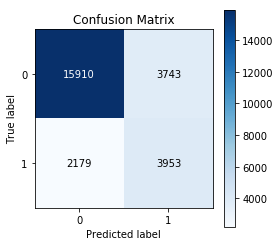

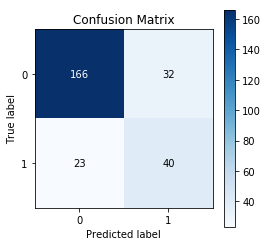

In [27]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.800):
            print('cancelling since validation accuracy has been reached to 80%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    tf.keras.layers.Dense(264,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
                                  
                             
                             tf.keras.layers.Dense(2,activation='softmax')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
X_train_t,X_validation,y_train_t,y_validation=train_test_split(X_train,y_train,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train_t.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train_t.shape))
print("y_test_shape: "+str(y_test.shape))
print("X_validation_shape: "+str(X_validation.shape))
print("y_validation_shape: "+str(y_validation.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train_t,y_train_t,epochs=100,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_6%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

X_train_shape: (25527, 60)
X_test_shape: (261, 60)
y_train_shape: (25527, 2)
y_test_shape: (261, 2)
X_validation_shape: (258, 60)
y_validation_shape: (258, 2)
Train on 25527 samples, validate on 261 samples
Epoch 1/100
25527/25527 [==============================] - 3s 133us/sample - loss: 0.9517 - accuracy: 0.7657 - val_loss: 0.8212 - val_accuracy: 0.7816
Epoch 2/100
25527/25527 [==============================] - 3s 128us/sample - loss: 0.9058 - accuracy: 0.7698 - val_loss: 0.7589 - val_accuracy: 0.7854
Epoch 3/100
25527/25527 [==============================] - 3s 124us/sample - loss: 0.8910 - accuracy: 0.7697 - val_loss: 0.8290 - val_accuracy: 0.7816
Epoch 4/100
25527/25527 [==============================] - 3s 120us/sample - loss: 0.8877 - accuracy: 0.7700 - val_loss: 0.7900 - val_accuracy: 0.7854
Epoch 5/100
25527/25527 [==============================] - 3s 124us/sample - loss: 0.9668 - accuracy: 0.7662 - val_loss: 0.8487 - val_accuracy: 0.7854
Epoch 6/100
25527/25527 [=============

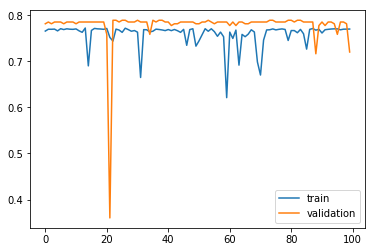

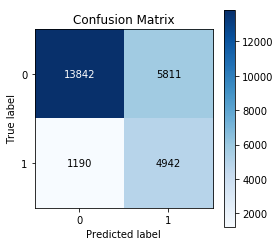

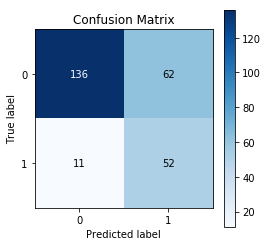

In [33]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.800):
            print('cancelling since validation accuracy has been reached to 80%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
X_train_t,X_validation,y_train_t,y_validation=train_test_split(X_train,y_train,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train_t.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train_t.shape))
print("y_test_shape: "+str(y_test.shape))
print("X_validation_shape: "+str(X_validation.shape))
print("y_validation_shape: "+str(y_validation.shape))
model=load_model("Model80_6%.h5")
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train_t,y_train_t,epochs=100,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_7%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

X_train_shape: (25527, 60)
X_test_shape: (261, 60)
y_train_shape: (25527, 2)
y_test_shape: (261, 2)
X_validation_shape: (258, 60)
y_validation_shape: (258, 2)
Train on 25527 samples, validate on 261 samples
Epoch 1/100
25527/25527 [==============================] - 7s 263us/sample - loss: 1.0363 - accuracy: 0.7704 - val_loss: 1.0184 - val_accuracy: 0.7854
Epoch 2/100
25527/25527 [==============================] - 6s 238us/sample - loss: 1.0370 - accuracy: 0.7702 - val_loss: 1.0172 - val_accuracy: 0.7854
Epoch 3/100
25527/25527 [==============================] - 7s 275us/sample - loss: 1.0490 - accuracy: 0.7699 - val_loss: 1.0304 - val_accuracy: 0.7778
Epoch 4/100
25527/25527 [==============================] - 7s 261us/sample - loss: 1.0484 - accuracy: 0.7682 - val_loss: 0.9748 - val_accuracy: 0.7816
Epoch 5/100
25527/25527 [==============================] - 7s 281us/sample - loss: 1.0285 - accuracy: 0.7703 - val_loss: 0.9745 - val_accuracy: 0.7816
Epoch 6/100
25527/25527 [=============

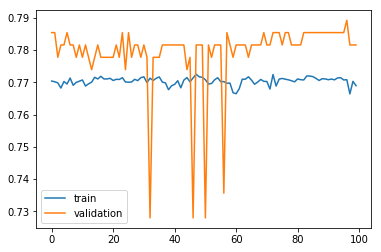

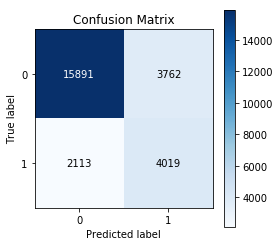

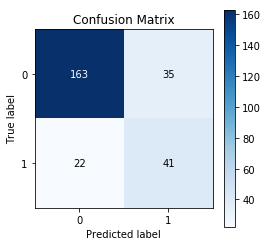

In [37]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.800):
            print('cancelling since validation accuracy has been reached to 80%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
X_train_t,X_validation,y_train_t,y_validation=train_test_split(X_train,y_train,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train_t.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train_t.shape))
print("y_test_shape: "+str(y_test.shape))
print("X_validation_shape: "+str(X_validation.shape))
print("y_validation_shape: "+str(y_validation.shape))
model=load_model("Model80_7%.h5")
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train_t,y_train_t,epochs=100,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_8%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.800):
            print('cancelling since validation accuracy has been reached to 80%')
            self.model.stop_training=True
callbacks_3=myCallback() 
import keras
import tensorflow as tf
model=tf.keras.models.Sequential([ 
                                   tf.keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    tf.keras.layers.Dense(264,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
                                  
                             
                             tf.keras.layers.Dense(2,activation='softmax')
])
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_=to_categorical(lables)
X_train,X_test,y_train,y_test=train_test_split(features,y_,test_size=0.01,random_state=12)
X_train_t,X_validation,y_train_t,y_validation=train_test_split(X_train,y_train,test_size=0.01,random_state=12)
print("X_train_shape: "+str(X_train_t.shape))
print("X_test_shape: "+str(X_test.shape))
print("y_train_shape: "+str(y_train_t.shape))
print("y_test_shape: "+str(y_test.shape))
print("X_validation_shape: "+str(X_validation.shape))
print("y_validation_shape: "+str(y_validation.shape))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='RMSProp')
history=model.fit(X_train_t,y_train_t,epochs=100,validation_data=(X_test,y_test),callbacks=[callbacks_3])
model.save("Model80_6%.h5")
y_train_=np.argmax(y_train,axis=1)
y_test_=np.argmax(y_test,axis=1)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
y_pred_train_=np.argmax(y_pred_train,axis=1)
y_pred_test_=np.argmax(y_pred_test,axis=1)
import scikitplot as skplt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
print("F1_score_train: "+str(f1_score(y_train_,y_pred_train_)))
print("F1_score_test: "+str(f1_score(y_test_,y_pred_test_)))
skplt.metrics.plot_confusion_matrix(y_train_,y_pred_train_,figsize=(4,4))
skplt.metrics.plot_confusion_matrix(y_test_,y_pred_test_,figsize=(4,4))

In [38]:
y_pred_validation=model.predict(X_validation)
y_validation_=np.argmax(y_validation,axis=1)
y_pred_validation=np.argmax(y_pred_validation,axis=1)
print("F1_score_train: "+str(f1_score(y_validation_,y_pred_validation)))

F1_score_train: 0.4444444444444445


In [35]:
netgain_test=model.predict(test_final)
netgain_test=np.argmax(netgain_test,axis=1)


In [36]:
netgain_test=pd.DataFrame(netgain_test)
test_=pd.read_csv("test.csv")
id=test_['id']
sub=pd.concat([id,netgain_test],axis=1)
sub.columns=['id','netgain']
sub['netgain'].replace({0:'False',1:'True'},inplace=True)
sub.to_csv("Results_NN_Val_5.csv",index=False)